# Ensemble Project

# Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed. 


# Domain:
Banking

# Context:
Leveraging customer information is paramount for most businesses. In the case of a bank,
attributes of customers like the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product

# Attribute Information:
1. age (numeric)
2. job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)
4. education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','univers
ity.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet,
the duration is not known before a call is performed. Also, after the end of the
call y is obviously known. Thus, this input should only be included for benchmark
purposes and should be discarded if the intention is to have a realistic predictive
model.
13. campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client
(numeric)
16. poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary: "yes","no")


# Learning Outcomes:
 Exploratory Data Analysis
 Preparing the data to train a model
 Training and making predictions using an Ensemble Model
 Tuning an Ensemble model

# Objective:
The classification goal is to predict if the client will subscribe (yes/no) a term deposit
(variable y).

# 1. Import the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error

# 2. Read the data as a data frame

In [2]:
data_frame= pd.read_csv('bank-full.csv')
print(data_frame.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


In [3]:
# a. Shape of the data
print(data_frame.shape)
data_frame.head(5)

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# b. Data type of each attribute 
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# c. Checking the presence of missing values 
data_frame.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

 Observation:  Dataset donot have null or missing values

In [6]:
# d. 5 Point summary of numerical attributes
data_frame.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
print(data_frame['pdays'])

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64


Observations:
In pdays min,25%,50%,75% data showes that it is -1 but it is invalid.

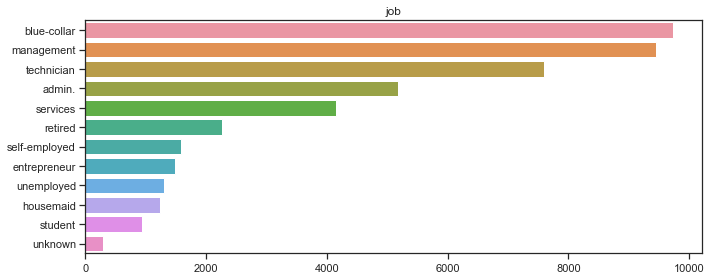

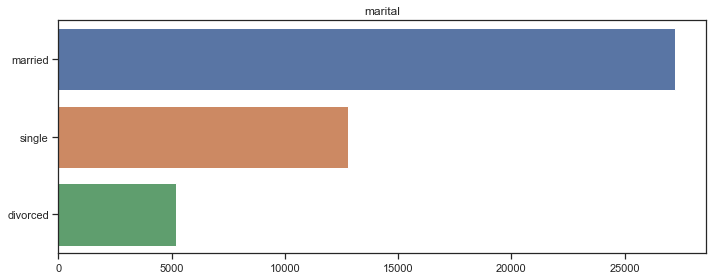

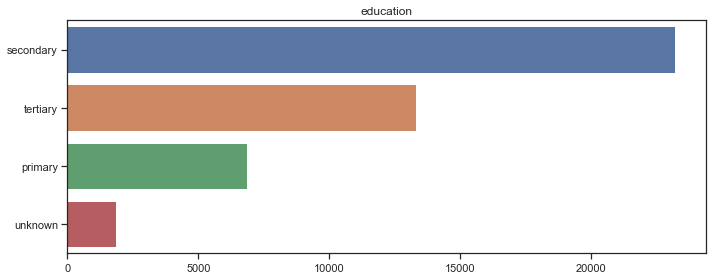

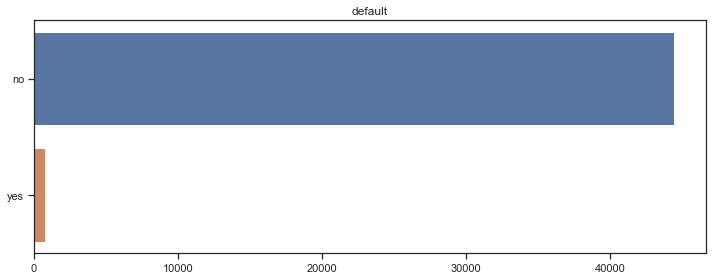

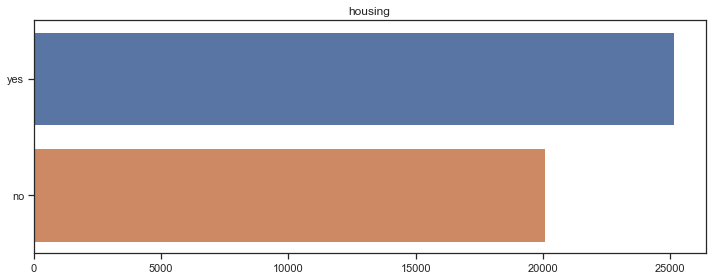

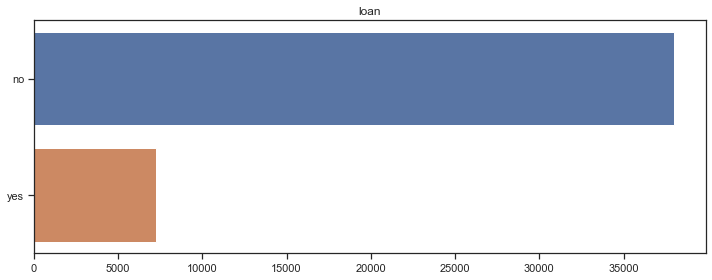

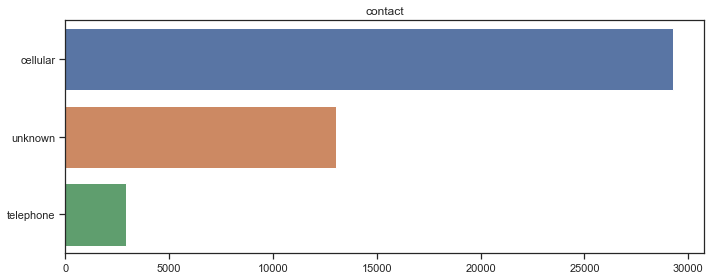

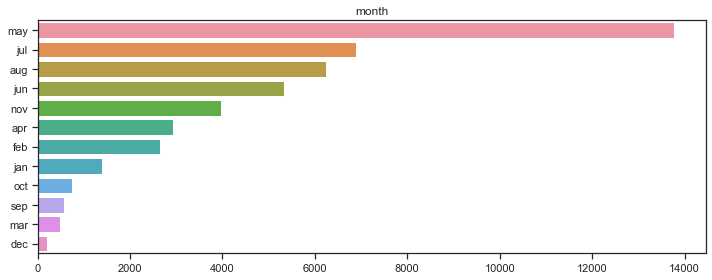

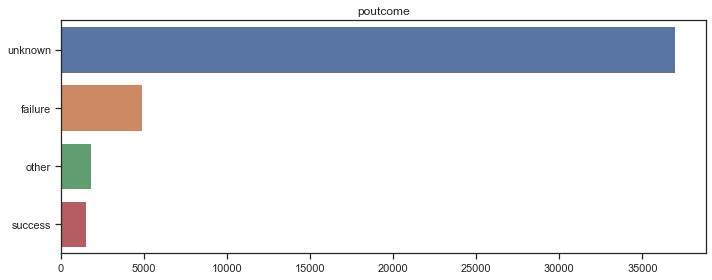

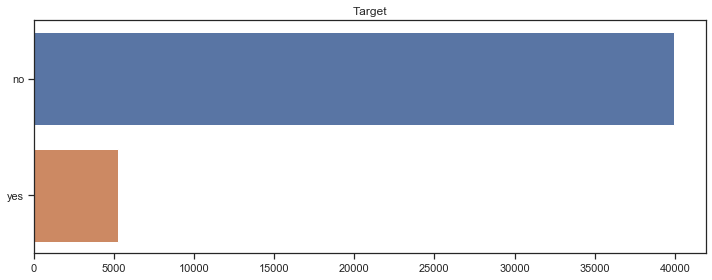

In [8]:
# Exploratory Data Analysis
# Categorical Variables
categorical_variables=['job','marital','education','default','housing','loan','contact','month','poutcome','Target']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data_frame[col].value_counts().values,data_frame[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()


In [9]:
data_frame.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

Observations:
   1.Dataset is highty imbalanced.
   2.Top targets are from blue collar,management and technician job
   3.Most of the pepole contacted have previous outcome as unknown.
   4.Most of the pepole who was contacted have tertiray and secondary education
   5.Very few clients are contacted who are defaulter
   6.Most of the clients are contacted through cellular
   7.Most of the clients are contacted in month of May

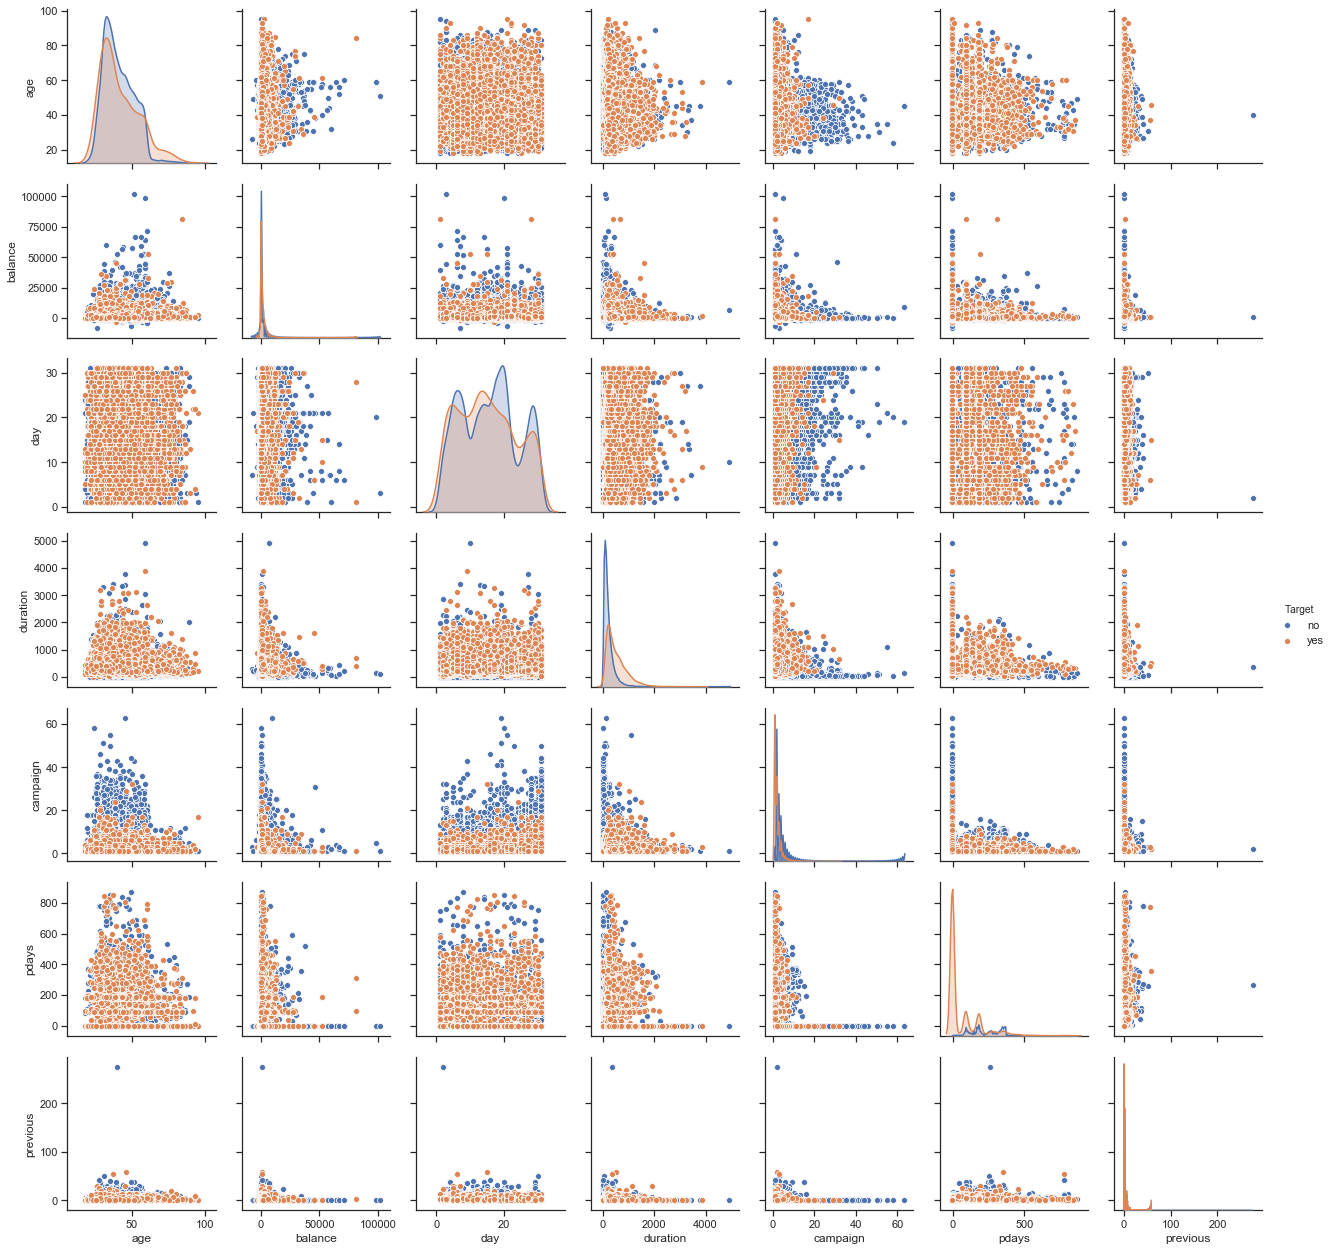

In [10]:
sns.pairplot(data_frame, hue='Target')

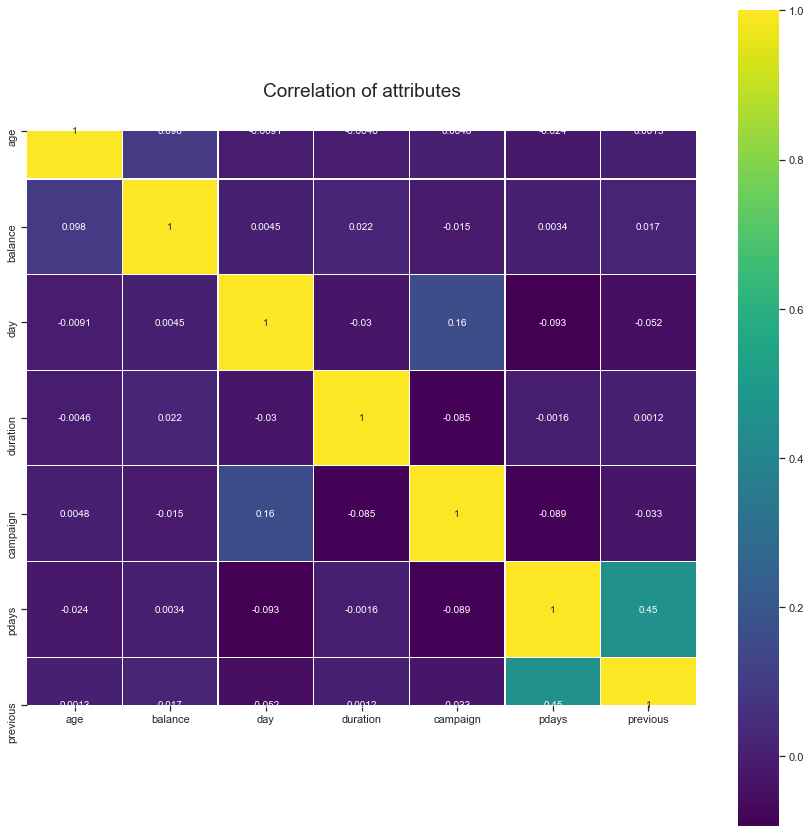

In [11]:
# Correlation Plot
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Correlation of attributes', y=1.05, size=19)
sns.heatmap(data_frame.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Observations:
    1.pdays and previous are highly correlated

# 4. Prepare the data to train a model 

In [12]:
# Label Encoding
le=preprocessing.LabelEncoder()
data_frame.job=le.fit_transform(data_frame.job)
data_frame.marital=le.fit_transform(data_frame.marital)
data_frame.education=le.fit_transform(data_frame.education)
data_frame.default=le.fit_transform(data_frame.default)
data_frame.housing=le.fit_transform(data_frame.housing)
data_frame.loan=le.fit_transform(data_frame.loan)
data_frame.contact=le.fit_transform(data_frame.contact)
data_frame.month=le.fit_transform(data_frame.month)
data_frame.poutcome=le.fit_transform(data_frame.job)
data_frame.Target=le.fit_transform(data_frame.Target)
print(data_frame.shape)
data_frame.head()


(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,4,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,9,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,2,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,11,0


In [13]:
# e. Checking the presence of outliers  
# By using IQR score method
Q1=data_frame.quantile(0.25)
Q3=data_frame.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age            15.0
job             6.0
marital         1.0
education       1.0
default         0.0
balance      1356.0
housing         1.0
loan            0.0
contact         2.0
day            13.0
month           5.0
duration      216.0
campaign        2.0
pdays           0.0
previous        0.0
poutcome        6.0
Target          0.0
dtype: float64


In [14]:
print(data_frame<(Q1 - 1.5 * IQR)) | (data_frame > (Q3 + 1.5 * IQR))

         age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False      False    False    False    False  False   
4      False  False    False      False    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact    day  month  duration  campaign  pdays  previous  poutcome

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

# 5.Train a few standard classification algorithms, note and comment on their performances across different classification metrics.  

# Train and Test split

In [15]:
X = data_frame.drop('Target',axis=1)     
Y = data_frame['Target']    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31647, 16)
(31647,)
(13564, 16)
(13564,)


  #  Logistic Regression

In [16]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#predict on test
y_predict = model.predict(X_test)

In [18]:
# Calculation of accuracy
model_score = model.score(X_test, Y_test)
print(model_score)

0.890002948982601


In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(Y_test, y_predict), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,11758,255
Yes,1237,314


In [20]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': model_score})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003


# SVM

In [21]:
from sklearn.svm import SVC
svc = SVC(gamma=0.025, C=3)
svc.fit(X_train, Y_train)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred = svc.predict(X_test)

In [23]:
# Calculation of accuracy
ac=accuracy_score(Y_test , y_pred) # Calling getAccuracy function 

In [24]:
tempResultsDf = pd.DataFrame({'Method':['SVM'], 'accuracy': [ac]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432


In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(Y_test, y_pred), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,12010,3
Yes,1551,0


#  DecisionTreeClassifier

In [26]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [27]:
y_predict =dTree.predict(X_test)

In [28]:
# Calculation of accuracy
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

1.0
0.8664848127396049


In [29]:
as_dt=dTree.score(X_test, Y_test)

In [30]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': [as_dt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485


In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(Y_test, y_predict), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,11056,957
Yes,854,697


In [32]:
from sklearn.tree import export_graphviz
from sklearn.tree import tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = data_frame.drop('Target', axis=1)
feature_cols = xvar.columns

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [33]:
target_names = ['No', 'Yes']


In [34]:
dot_data = StringIO()
tree.export_graphviz(cm, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=list(target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

SyntaxError: invalid syntax (<ipython-input-34-4eae07d2736d>, line 5)

# Random Forest Classifier

In [35]:
randomforest_model=RandomForestClassifier(max_depth=2,random_state=0)
randomforest_model.fit(X_train, Y_train)

C:\Users\SUPRIYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

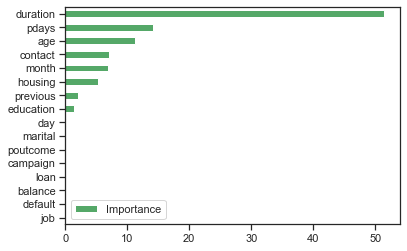

In [36]:
Importance=pd.DataFrame({'Importance': randomforest_model.feature_importances_*100},index= X_train.columns)
Importance.sort_values('Importance',axis=0,ascending= True).plot(kind='barh',color='g')

Observation:
    Duraion is the most important feature in give dataset.

In [37]:
# Calculation of accuracy
y_predic=randomforest_model.predict(X_test)
randomforest_model.score(X_test,Y_test)

0.8856531996461221

In [38]:
randomforest_model.score(X_train,Y_train)

0.8818845388188454

In [39]:
as_rf=randomforest_model.score(X_test,Y_test)

In [40]:
tempResultsDf = pd.DataFrame({'Method':['random forest'], 'accuracy': [as_rf]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485
0,random forest,0.885653


# KNN

In [41]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(X_train,Y_train)
predicted_labels=knn.predict(X_test)
knn.score(X_test, Y_test)

0.8830728398702448

In [42]:
as_knn=knn.score(X_test,Y_test)

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(Y_test,predicted_labels), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,11547,466
Yes,1120,431


In [44]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'accuracy': [as_knn]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485
0,random forest,0.885653
0,KNN,0.883073


# Navie Bayes

In [45]:
navie_model= GaussianNB()
navie_model.fit(X_train,Y_train)
prediction= navie_model.predict(X_test)
navie_model.score(X_test, Y_test)

0.8569006192863462

In [46]:
as_nv=navie_model.score(X_test, Y_test)

In [47]:
navie_model.score(X_train,Y_train)

0.8570796599993681

In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(Y_test, prediction), index=['No','Yes'], columns=['No','Yes'])
cm.index.name ='Predicted'
cm.columns.name ='True'
cm

True,No,Yes
Predicted,,
No,10936,1077
Yes,864,687


In [49]:
tempResultsDf = pd.DataFrame({'Method':['Navie Bayes'], 'accuracy': [as_nv]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485
0,random forest,0.885653
0,KNN,0.883073
0,Navie Bayes,0.856901


# 6. Build the ensemble models and compare the results with the base models. 

# 1. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [50]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, Y_train)

test_pred = abcl.predict(X_test)
abcl.score(X_test,Y_test)

0.8880861102919493

In [51]:
as_ae=abcl.score(X_test,Y_test)

In [52]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoostClassifier'], 'accuracy': [as_ae]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485
0,random forest,0.885653
0,KNN,0.883073
0,Navie Bayes,0.856901
0,AdaBoostClassifier,0.888086


# 2. Apply Bagging Classifier Algorithm and print the accuracy.

In [53]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, Y_train)

In [54]:
test_pred = bgcl.predict(X_test)
bgcl.score(X_test, Y_test)

0.8985549985255087

In [55]:
as_bc=bgcl.score(X_test, Y_test)

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [as_bc]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485
0,random forest,0.885653
0,KNN,0.883073
0,Navie Bayes,0.856901
0,AdaBoostClassifier,0.888086
0,Bagging,0.898555


# 3. Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, Y_train)

In [58]:
test_pred = gbcl.predict(X_test)
gbcl.score(X_test, Y_test)

0.893246829843704

In [59]:
as_gb=gbcl.score(X_test, Y_test)

# 7. Compare performances of all the models 

In [60]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': [as_gb]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.890003
0,SVM,0.885432
0,Decision Tree,0.866485
0,random forest,0.885653
0,KNN,0.883073
0,Navie Bayes,0.856901
0,AdaBoostClassifier,0.888086
0,Bagging,0.898555
0,Gradient Boosting,0.893247


# Conclusion

1.Dataset consist of 17 number of  features, out of these only half of them are important.
2.Different machine learning models are trained and tested on the dataset. Out of those Bagging Classifier performs best. Gradient Boosting & Logistic Regression is also an important model as it results in high accuracy score.
3.Different models are summarized in above table.